## Simulations Mai 2025
Quarterly *.pop files used.  
Simulations with lower diameter threshold = 10 cm  
Threshold factor (*.opt file) = 2.1  
Ohne Plugin!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import getdata
import sortdata
import plotting 
from tabulate import tabulate
from main_frag_and_rest import main_magnitude_cut
from getdata import PopulationType, data_for_one_year_one_seed

base_dir = os.path.join("output", "results_simulation_quarterly_10cm")
os.makedirs(base_dir, exist_ok=True)
getdata.clear_directory(base_dir)

# year ranges, the data of one range ends up in one plot
year_ranges = [np.array([year]) for year in range(2019, 2024)]
seeds = [1]

for years in year_ranges: 
    print(years)
    crs_all_seeds = []
    det_all_seeds = []

    monthly_files_by_year_and_seed = {}

    for seed in seeds: 
        crs_data_single_years = []
        det_data_single_years = []

        for year in years:
            for seed in seeds:
                orbit_files = []
                for orbit in ["geo", "gto", "fol"]:
                    crs_files, det_files = getdata.find_monthly_files("input", year, orbit, seed)
                    orbit_files.append((crs_files, det_files))
                flattened = [f for pair in orbit_files for f in pair]
                monthly_files_by_year_and_seed[(year, seed)] = flattened

            crs_per_orbit = []
            det_per_orbit = []

            for orbit in ["geo", "gto", "fol"]:
                crs_files, det_files = getdata.find_monthly_files("input", year, orbit, seed)

                if len(crs_files) == 0 or len(det_files) == 0:
                    print(f"Warning: No files found for year {year}, orbit {orbit}, seed {seed}")
                    crs_per_orbit.append(np.empty((0,)))
                    det_per_orbit.append(np.empty((0,)))
                    continue

                crs_arrays = [getdata.array_extender(f) for f in crs_files]
                det_arrays = [getdata.array_extender(f) for f in det_files]

                for file, data in zip(det_files, det_arrays):
                    data = np.array(data)
                    print(f"{file}: {data.shape[1] if data.ndim > 1 else 0} objects")

                data_crs = np.hstack(crs_arrays) if crs_arrays else np.empty((0,))
                data_det = np.hstack(det_arrays) if det_arrays else np.empty((0,))

                crs_per_orbit.append(data_crs)
                det_per_orbit.append(data_det)

            crs_data_single_years.append(tuple(crs_per_orbit))
            det_data_single_years.append(tuple(det_per_orbit))

        crs_GEO = np.hstack([triple[0] for triple in crs_data_single_years])
        crs_GTO = np.hstack([triple[1] for triple in crs_data_single_years])
        crs_fol = np.hstack([triple[2] for triple in crs_data_single_years])

        det_GEO = np.hstack([triple[0] for triple in det_data_single_years])
        det_GTO = np.hstack([triple[1] for triple in det_data_single_years])
        det_fol = np.hstack([triple[2] for triple in det_data_single_years])

        crs_all_seeds.append((crs_GEO, crs_GTO, crs_fol))
        det_all_seeds.append((det_GEO, det_GTO, det_fol))

    year_label = years[0]
    years_dir = os.path.join(base_dir, f"results_{year_label}")
    os.makedirs(years_dir, exist_ok=True)
    getdata.clear_directory(years_dir)

    all_GEO_det = np.hstack([triple[0] for triple in det_all_seeds])
    all_GTO_det = np.hstack([triple[1] for triple in det_all_seeds])
    all_fol_det = np.hstack([triple[2] for triple in det_all_seeds])

    all_GEO_crs = np.hstack([triple[0] for triple in crs_all_seeds])
    all_GTO_crs = np.hstack([triple[1] for triple in crs_all_seeds])
    all_fol_crs = np.hstack([triple[2] for triple in crs_all_seeds])

    num_GEO, num_GTO, num_fol = getdata.data_monthly_one_seed(
        [all_GEO_crs, all_GTO_crs, all_fol_crs],
        [all_GEO_det, all_GTO_det, all_fol_det],
        years,
        years_dir,
        "",
        seeds,
        monthly_files_by_year_and_seed
    )

    combined_data_det = np.hstack([arr for arr in [all_GEO_det, all_GTO_det, all_fol_det] if arr.size > 0])
    print("Combined detected shape:", combined_data_det.shape)

    TLE, frag, rest = sortdata.data_sorter(combined_data_det, 8, 10, 9, 20, 3, 1)

    print("TLE shape:", TLE.shape)
    print("Fragment shape:", frag.shape)
    print("Rest shape:", rest.shape)

    if frag.size > 0 and rest.size > 0:
        combined_data_det = np.vstack([frag, rest])
    elif frag.size > 0:
        combined_data_det = frag
    elif rest.size > 0:
        combined_data_det = rest
    else:
        print("Both arrays are empty. No data to combine.")
        combined_data_det = np.array([])

    print("Filtered combined shape:", combined_data_det.shape)

[2019]
input\stat_Master_19_geo_s1_02.det: 159 objects
input\stat_Master_19_geo_s1_05.det: 97 objects
input\stat_Master_19_geo_s1_11.det: 376 objects
input\stat_Master_19_gto_s1_02.det: 298 objects
input\stat_Master_19_gto_s1_05.det: 36 objects
input\stat_Master_19_gto_s1_11.det: 236 objects
input\stat_Master_19_fol_s1_02.det: 75 objects
input\stat_Master_19_fol_s1_05.det: 12 objects
input\stat_Master_19_fol_s1_11.det: 193 objects
Direct filenames ['input\\stat_Master_19_geo_s1_02.crs', 'input\\stat_Master_19_gto_s1_02.crs', 'input\\stat_Master_19_fol_s1_02.crs', 'input\\stat_Master_19_geo_s1_02.det', 'input\\stat_Master_19_gto_s1_02.det', 'input\\stat_Master_19_fol_s1_02.det']
Direct filenames ['input\\stat_Master_19_geo_s1_05.crs', 'input\\stat_Master_19_gto_s1_05.crs', 'input\\stat_Master_19_fol_s1_05.crs', 'input\\stat_Master_19_geo_s1_05.det', 'input\\stat_Master_19_gto_s1_05.det', 'input\\stat_Master_19_fol_s1_05.det']
Direct filenames ['input\\stat_Master_19_geo_s1_11.crs', 'inp

<Figure size 640x480 with 0 Axes>

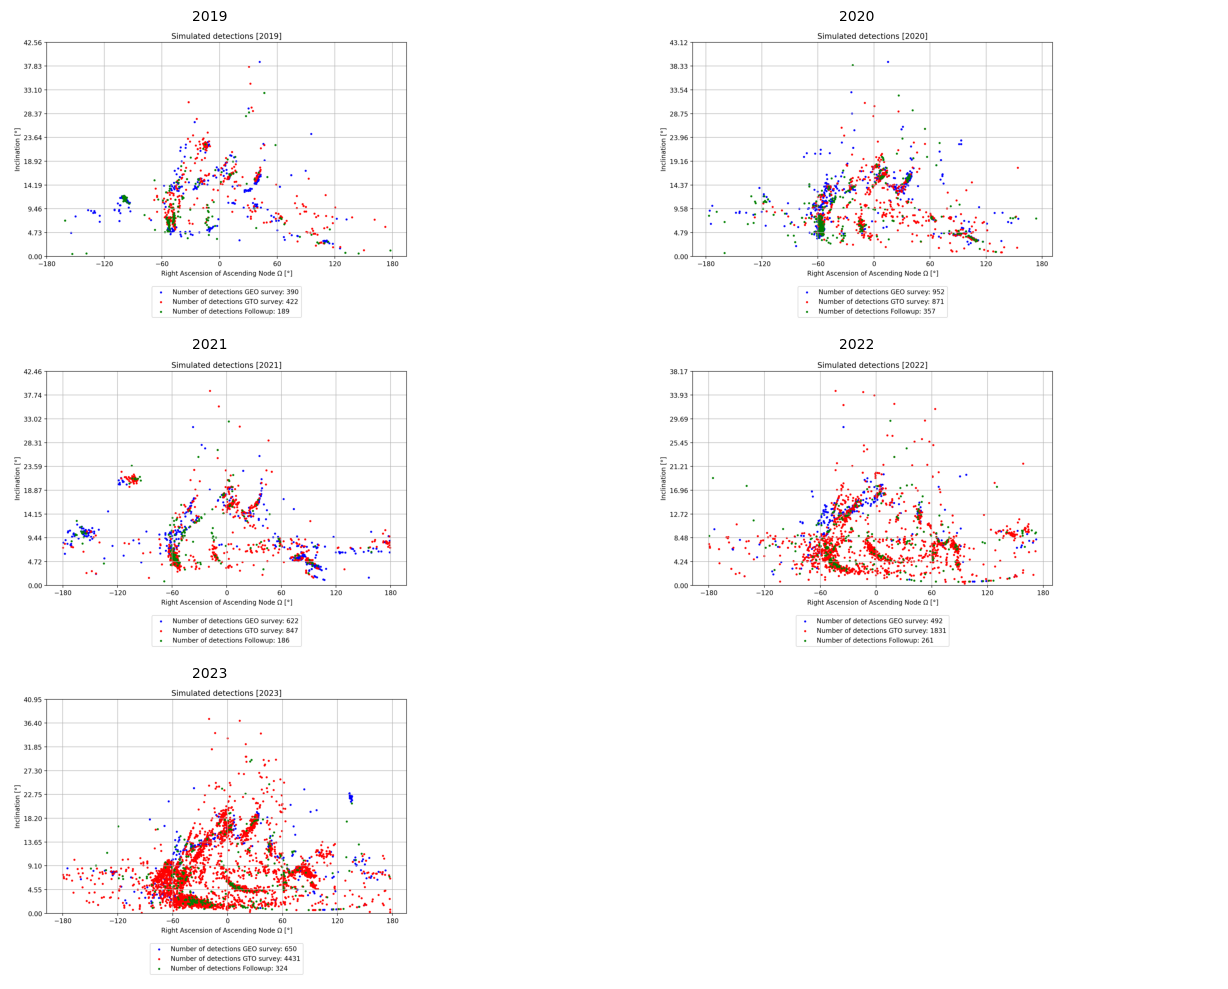

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# List of image paths
image_paths = [
    r"C:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\output\results_simulation_quarterly_10cm\results_2019\omega_i_[2019]_detected_only_orbits_labeled.png",
    r"C:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\output\results_simulation_quarterly_10cm\results_2020\omega_i_[2020]_detected_only_orbits_labeled.png",
    r"C:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\output\results_simulation_quarterly_10cm\results_2021\omega_i_[2021]_detected_only_orbits_labeled.png",
    r"C:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\output\results_simulation_quarterly_10cm\results_2022\omega_i_[2022]_detected_only_orbits_labeled.png",
    r"C:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\output\results_simulation_quarterly_10cm\results_2023\omega_i_[2023]_detected_only_orbits_labeled.png"
]

# Create figure with subplots — larger figure size for bigger images
fig, axs = plt.subplots(3, 2, figsize=(14, 10))
axs = axs.flatten()

years = [2019, 2020, 2021, 2022, 2023]

# Display images
for i, (path, year) in enumerate(zip(image_paths, years)):
    img = mpimg.imread(path)
    axs[i].imshow(img)
    axs[i].axis('off')  # Hide axes
    axs[i].set_title(f"{year}", fontsize=10)  # Smaller title

# Hide any extra subplot axes
for j in range(len(image_paths), len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import os
import getdata
import sortdata
import plotting

# ---- Configuration ----
BASE_DIR = os.path.join("output", "results_simulation_quarterly_10cm_with_id")
os.makedirs(BASE_DIR, exist_ok=True)
getdata.clear_directory(BASE_DIR)

YEAR_RANGES = [np.array([y]) for y in range(2019, 2024)]
SEEDS = [1]
META_FILE = getdata.read_metadata_file("input/geogto.dat")

# ---- Main loop ----
for years in YEAR_RANGES:
    print(f"Processing years: {years}")
    # Prepare output directory for this year range
    year_label = years[0]
    out_dir = os.path.join(BASE_DIR, f"results_{year_label}")
    os.makedirs(out_dir, exist_ok=True)
    getdata.clear_directory(out_dir)

    # Step 1: Build file map for each (year, seed)
    monthly_files = {}  # (year, seed) -> [GEO_crs, GEO_det, GTO_crs, GTO_det, FOL_crs, FOL_det]
    for seed in SEEDS:
        for year in years:
            files = []
            for orbit in ("geo", "gto", "fol"):
                crs_files, det_files = getdata.find_monthly_files("input", year, orbit, seed)
                files.extend([crs_files, det_files])
            monthly_files[(year, seed)] = files

    # Step 2: Load and stack CRS/DET arrays per seed
    crs_all = []  # list of (GEO, GTO, FOL) tuples per seed
    det_all = []
    for seed in SEEDS:
        crs_per_orbit = {orbit: [] for orbit in ("geo", "gto", "fol")}
        det_per_orbit = {orbit: [] for orbit in ("geo", "gto", "fol")}

        for year in years:
            files = monthly_files[(year, seed)]
            # files is [GEO_crs, GEO_det, GTO_crs, GTO_det, FOL_crs, FOL_det]
            for orbit, (crs_list, det_list) in zip(("geo","gto","fol"),
                                                  zip(files[0::2], files[1::2])):
                if not crs_list or not det_list:
                    print(f"Warning: no files for {year}, {orbit}, seed {seed}")
                    continue

                # Extend and horizontally stack
                crs_arrays = [getdata.array_extender(f) for f in crs_list]
                det_arrays = [getdata.array_extender(f) for f in det_list]
                crs_per_orbit[orbit].append(np.hstack(crs_arrays) if crs_arrays else np.empty((0,)))
                det_per_orbit[orbit].append(np.hstack(det_arrays) if det_arrays else np.empty((0,)))

        # Final per-seed stacks
        crs_all.append(
            tuple(np.hstack(crs_per_orbit[o]) if crs_per_orbit[o] else np.empty((0,))
                  for o in ("geo","gto","fol"))
        )
        det_all.append(
            tuple(np.hstack(det_per_orbit[o]) if det_per_orbit[o] else np.empty((0,))
                  for o in ("geo","gto","fol"))
        )

    # Step 3: Concatenate across seeds for each orbit
    all_GEO_crs, all_GTO_crs, all_FOL_crs = map(
        lambda idx: np.hstack([seed_tuple[idx] for seed_tuple in crs_all]),
        range(3)
    )
    all_GEO_det, all_GTO_det, all_FOL_det = map(
        lambda idx: np.hstack([seed_tuple[idx] for seed_tuple in det_all]),
        range(3)
    )

    # Step 4: Apply filtering, sorting and plotting
    getdata.data_monthly_one_seed_with_id(
        [all_GEO_crs, all_GTO_crs, all_FOL_crs],
        [all_GEO_det, all_GTO_det, all_FOL_det],
        years,
        out_dir,
        "",
        SEEDS,
        monthly_files,
        META_FILE
    )

    # (Optional) Downstream combined sort of detections
    combined_det = np.hstack([arr for arr in (all_GEO_det, all_GTO_det, all_FOL_det) if arr.size])
    print(f"Combined detections shape: {combined_det.shape}")
    TLE, frag, rest = sortdata.data_sorter(combined_det, 8, 10, 9, 20, source_index=3, size_index=1)
    print(f"TLE: {TLE.shape}, frag: {frag.shape}, rest: {rest.shape}")
    # Merge fragment+rest if desired
    combined_filtered = frag if rest.size == 0 else rest if frag.size == 0 else np.vstack([frag, rest])
    print(f"Filtered combined shape: {combined_filtered.shape}")


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\getdata.py:1354: SyntaxWarning: invalid escape sequence '\O'
  plt.xlabel("RAAN [$\Omega$] [deg]")


Processing years: [2019]
Direct filenames ['input\\stat_Master_19_geo_s1_02.crs', 'input\\stat_Master_19_gto_s1_02.crs', 'input\\stat_Master_19_fol_s1_02.crs', 'input\\stat_Master_19_geo_s1_02.det', 'input\\stat_Master_19_gto_s1_02.det', 'input\\stat_Master_19_fol_s1_02.det']
Direct filenames ['input\\stat_Master_19_geo_s1_05.crs', 'input\\stat_Master_19_gto_s1_05.crs', 'input\\stat_Master_19_fol_s1_05.crs', 'input\\stat_Master_19_geo_s1_05.det', 'input\\stat_Master_19_gto_s1_05.det', 'input\\stat_Master_19_fol_s1_05.det']
Direct filenames ['input\\stat_Master_19_geo_s1_11.crs', 'input\\stat_Master_19_gto_s1_11.crs', 'input\\stat_Master_19_fol_s1_11.crs', 'input\\stat_Master_19_geo_s1_11.det', 'input\\stat_Master_19_gto_s1_11.det', 'input\\stat_Master_19_fol_s1_11.det']
here {287: '1965-108A', 639: '1967-001D', 93: '1976-105A', 100: '1977-068A', 97: '1977-027A', 101: '1977-092A', 98: '1977-047A', 110: '1979-077A', 461: '1979-101A', 109: '1979-058A', 349: '1980-018A', 111: '1979-104B', 

## Simulations performed with the ESA PROOF configuration (sent by André Horstmann on 25.06.2025)
## 04.07.2025: Applying my analyis/postprocessing script to the *.det files from ESA

Had to adapt the file finder function, as the filenames/folders are obviously different

In [1]:
import numpy as np
import os
import getdata
import sortdata
import plotting
from tabulate import tabulate
from main_frag_and_rest import main_magnitude_cut
from getdata import PopulationType, data_for_one_year_one_seed

base_dir = os.path.join("output", "simulations_ESA_configuration_1cm")
os.makedirs(base_dir, exist_ok=True)
getdata.clear_directory(base_dir)

# Year ranges — the data of one range ends up in one plot
year_ranges = [np.array([year]) for year in range(2001, 2024)]
seeds = [1]

for years in year_ranges:
    print(years)
    crs_all_seeds = []
    det_all_seeds = []

    monthly_files_by_year_and_seed = {}

    for seed in seeds:
        crs_data_single_years = []
        det_data_single_years = []

        for year in years:
            crs_count = 0
            det_count = 0

            # Initialize entry ONCE per year-seed
            monthly_files_by_year_and_seed[(year, seed)] = [[], []]

            for month in [2, 5, 8, 11]:
                crs_files, det_files = getdata.find_monthly_files_from_ESA(
                    "input/det_crs_files_from_ESA_configuration",
                    year, month
                )
                if len(crs_files) == 0 or len(det_files) == 0:
                    print(f"Warning: No files found for year {year}, month {month}")
                    continue

                crs_count += len(crs_files)
                det_count += len(det_files)

                # Append to the lists instead of overwrite
                monthly_files_by_year_and_seed[(year, seed)][0].extend(crs_files)
                monthly_files_by_year_and_seed[(year, seed)][1].extend(det_files)

                # If you want to load data here, do it:
                crs_arrays = [getdata.array_extender(f) for f in crs_files]
                det_arrays = [getdata.array_extender(f) for f in det_files]

                if crs_arrays:
                    crs_data_single_years.append(np.hstack(crs_arrays))
                if det_arrays:
                    det_data_single_years.append(np.hstack(det_arrays))

            print(f"Year {year} | CRS files found: {crs_count} | DET files found: {det_count}")

        crs_all_years = np.hstack(crs_data_single_years) if crs_data_single_years else np.empty((0,))
        det_all_years = np.hstack(det_data_single_years) if det_data_single_years else np.empty((0,))

        crs_all_seeds.append(crs_all_years)
        det_all_seeds.append(det_all_years)

    # Skip if last loop found nothing
    if not any([arr.size > 0 for arr in crs_all_seeds]) or not any([arr.size > 0 for arr in det_all_seeds]):
        continue

    all_crs = np.array(crs_all_seeds)
    all_det = np.array(det_all_seeds)

    num_objects = getdata.data_monthly_one_seed_for_ESA(
        [all_crs],
        [all_det],
        years,
        base_dir,
        "",
        seeds,
        monthly_files_by_year_and_seed
    )


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\getdata.py:1472: SyntaxWarning: invalid escape sequence '\O'
  plt.xlabel("RAAN [$\Omega$] [deg]")


[2001]
Year 2001 | CRS files found: 3 | DET files found: 3
Direct filenames [None, None, 'input/det_crs_files_from_ESA_configuration\\ESA-SDT-20010201.crs', None, None, 'input/det_crs_files_from_ESA_configuration\\ESA-SDT-20010201.det']
(25, 8817) (25, 335)
Direct filenames [None, None, 'input/det_crs_files_from_ESA_configuration\\ESA-SDT-20010501.crs', None, None, 'input/det_crs_files_from_ESA_configuration\\ESA-SDT-20010501.det']
(25, 8240) (25, 329)
Direct filenames [None, None, 'input/det_crs_files_from_ESA_configuration\\ESA-SDT-20010801.crs', None, None, 'input/det_crs_files_from_ESA_configuration\\ESA-SDT-20010801.det']
(25, 5747) (25, 171)
(25, 835)
inc, nod 835 835
[2002]
Year 2002 | CRS files found: 4 | DET files found: 4
Direct filenames [None, None, 'input/det_crs_files_from_ESA_configuration\\ESA-SDT-20020201.crs', None, None, 'input/det_crs_files_from_ESA_configuration\\ESA-SDT-20020201.det']
(25, 8094) (25, 327)
Direct filenames [None, None, 'input/det_crs_files_from_ESA

<Figure size 640x480 with 0 Axes>

### Second try with population from January

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import getdata
import sortdata
import plotting 
from tabulate import tabulate
from main_frag_and_rest import main_magnitude_cut
from getdata import PopulationType, data_for_one_year_one_seed

base_dir = os.path.join("output", "simulations_ESA_configuration_janpop")
os.makedirs(base_dir, exist_ok=True)
getdata.clear_directory(base_dir)

# Year ranges — the data of one range ends up in one plot
year_ranges = [np.array([year]) for year in range(2001, 2024)]
seeds = [1]

for years in year_ranges:
    print(years)
    crs_all_seeds = []
    det_all_seeds = []

    monthly_files_by_year_and_seed = {}

    for seed in seeds:
        crs_data_single_years = []
        det_data_single_years = []

        for year in years:
            crs_count = 0
            det_count = 0
            for month in [2, 5, 8, 11]:
                crs_files, det_files = getdata.find_monthly_files_from_ESA("input/det_crs_files_from_ESA_configuration_janpop", year, month)
                if len(crs_files) == 0 or len(det_files) == 0:
                    print(f"Warning: No files found for year {year}, month {month}")
                    continue

                crs_count += len(crs_files)
                det_count += len(det_files)

                key = (year, seed)
                monthly_files_by_year_and_seed.setdefault(key, [[], []])
                monthly_files_by_year_and_seed[key][0].extend(crs_files)
                monthly_files_by_year_and_seed[key][1].extend(det_files)



        print(f"Year {year} | CRS files found: {crs_count} | DET files found: {det_count}")

        crs_all_years = np.hstack(crs_data_single_years) if crs_data_single_years else np.empty((0,))
        det_all_years = np.hstack(det_data_single_years) if det_data_single_years else np.empty((0,))

        crs_all_seeds.append(crs_all_years)
        det_all_seeds.append(det_all_years)

    if crs_count == 0 or det_count == 0: 
        continue

    all_crs = np.array(crs_all_seeds)
    all_det = np.array(det_all_seeds)


    num_objects = getdata.data_monthly_one_seed_for_ESA(
        [all_crs],
        [all_det],
        years,
        base_dir,
        "",
        seeds,
        monthly_files_by_year_and_seed
    )

[2001]
Year 2001 | CRS files found: 3 | DET files found: 3
() ()
Direct filenames [None, None, 'input/det_crs_files_from_ESA_configuration_janpop\\ESA-SDT-20010201.crs', None, None, 'input/det_crs_files_from_ESA_configuration_janpop\\ESA-SDT-20010201.det']
(25, 9432) (25, 647)
() ()
Direct filenames [None, None, 'input/det_crs_files_from_ESA_configuration_janpop\\ESA-SDT-20010501.crs', None, None, 'input/det_crs_files_from_ESA_configuration_janpop\\ESA-SDT-20010501.det']
(25, 8955) (25, 917)
() ()
Direct filenames [None, None, 'input/det_crs_files_from_ESA_configuration_janpop\\ESA-SDT-20010801.crs', None, None, 'input/det_crs_files_from_ESA_configuration_janpop\\ESA-SDT-20010801.det']
(25, 6016) (25, 444)
(25, 2008)
inc, nod 2008 2008
[2002]
Year 2002 | CRS files found: 4 | DET files found: 4
() ()
Direct filenames [None, None, 'input/det_crs_files_from_ESA_configuration_janpop\\ESA-SDT-20020201.crs', None, None, 'input/det_crs_files_from_ESA_configuration_janpop\\ESA-SDT-20020201.det

<Figure size 640x480 with 0 Axes>